<a href="https://colab.research.google.com/github/Raushan2123/Research_Project/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
X_data = pd.read_csv('/content/drive/MyDrive/Processed_feature_data_16838.csv')

In [ ]:
X = X_data.iloc[:,2:]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Processed_data_16838.csv')

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Value,Unit
0,0,0,4.2.3.4,Actinidia chinensis,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,wildtype,20.1000,s^(-1)
1,1,1,4.2.3.4,Aspergillus nidulans,C(C(C(C(COP(=O)([O-])[O-])O)O)O)C(=O)C(=O)[O-],3-deoxy-D-arabino-heptulosonate 7-phosphate,MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,wildtype,6.8000,s^(-1)
2,2,2,4.2.3.4,Neurospora crassa,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,wildtype,19.0000,s^(-1)
3,3,3,2.1.1.255,Streptomyces coelicolor,C[S+](CCC(C(=O)[O-])N)CC1C(C(C(O1)N2C=NC3=C(N=...,S-Adenosyl-L-methionine,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0075,s^(-1)
4,4,4,2.1.1.255,Streptomyces coelicolor,CC(=CCCC(=C(C)COP(=O)(O)OP(=O)(O)O)C)C,(E)-2-Methylgeranyl diphosphate,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0390,s^(-1)


In [ ]:
y = data['Value']

In [ ]:
Label = y

In [ ]:
for i in range(len(Label)):
        if Label[i] == 0:
            Label[i] = -10000000000
        else:
            Label[i] = math.log(Label[i], 10)

Streaming output truncated to the last 5000 lines.
<ipython-input-31-6e3b40e57aa7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Label[i] = math.log(Label[i], 10)
<ipython-input-31-6e3b40e57aa7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Label[i] = math.log(Label[i], 10)
<ipython-input-31-6e3b40e57aa7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Label[i] = math.log(Label[i], 10)
<ipython-input-31-6e3b40e57aa7>:5: SettingW

In [ ]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Label, test_size=0.20, random_state=42)

In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg_pred=regression.predict(X_test)

In [ ]:
score=r2_score(y_test,reg_pred)
score

0.3446107133869345

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6499073448463617

In [ ]:
reg_pred=reg.predict(X_test)
score=r2_score(y_test,reg_pred)
score

0.6499073448463617

In [ ]:
mse = mean_squared_error(y_test,reg_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,reg_pred)
r_squared = r2_score(y_test,reg_pred)

print('RMSE :', rmse ,', MAE :', mae ,', R-square :',r_squared)

RMSE : 0.9034073875086442 , MAE : 0.6080770426457147 , R-square : 0.6499073448463617


###Using Correlation to reducee the features and finding the metrices

In [ ]:
X_train.shape

(15154, 1641)

In [ ]:
correlation_matrix = pd.DataFrame(X_train).corr() #if want to use using pandas
# correlation_matrix = np.corrcoef(X_train, rowvar=False) #if want to use using numpy

In [ ]:
correlation_matrix_test = pd.DataFrame(X_test).corr()

In [ ]:
correlation_matrix.shape

(2048, 2048)

In [ ]:
threshold = 0.8  # Define your correlation threshold

highly_correlated_features = set()  # Set to store highly correlated feature pairs

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

In [ ]:
threshold_test = 0.8  # Define your correlation threshold

highly_correlated_features_test = set()  # Set to store highly correlated feature pairs

for i in range(len(correlation_matrix_test.columns)):
    for j in range(i):
        if abs(correlation_matrix_test.iloc[i, j]) > threshold_test:
            colnames_test = correlation_matrix_test.columns[i]
            highly_correlated_features_test.add(colnames_test)

In [ ]:
len(highly_correlated_features),len(highly_correlated_features_test)

(407, 416)

In [ ]:
X_train = pd.DataFrame(X_train).drop(columns=highly_correlated_features)

In [ ]:
X_test = pd.DataFrame(X_test).drop(columns=highly_correlated_features)

In [ ]:
print(X_train.shape, X_test.shape)

(15154, 1641) (1684, 1641)


In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regg_pred=regression.predict(X_test)

In [ ]:
score=r2_score(y_test,regg_pred)
score

0.3558339468717585

In [ ]:
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.660654978143129

In [ ]:
reg_pred_test=reg.predict(X_test)
score=r2_score(y_test,reg_pred_test)
score

0.660654978143129

In [ ]:
reg_pred_train=reg.predict(X_train)
score=r2_score(y_train,reg_pred_train)
score

0.9999435672567035

In [ ]:
mse = mean_squared_error(y_test,reg_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,reg_pred)
r_squared = r2_score(y_test,reg_pred)

In [ ]:
print('RMSE :', rmse ,', MAE :', mae ,', R-square :',r_squared)

RMSE : 0.8723846346443882 , MAE : 0.5726940714101977 , R-square : 0.660654978143129


###Plotting the Predicted and Observed values of Training and Testing set

In [ ]:
import matplotlib.pyplot as plt

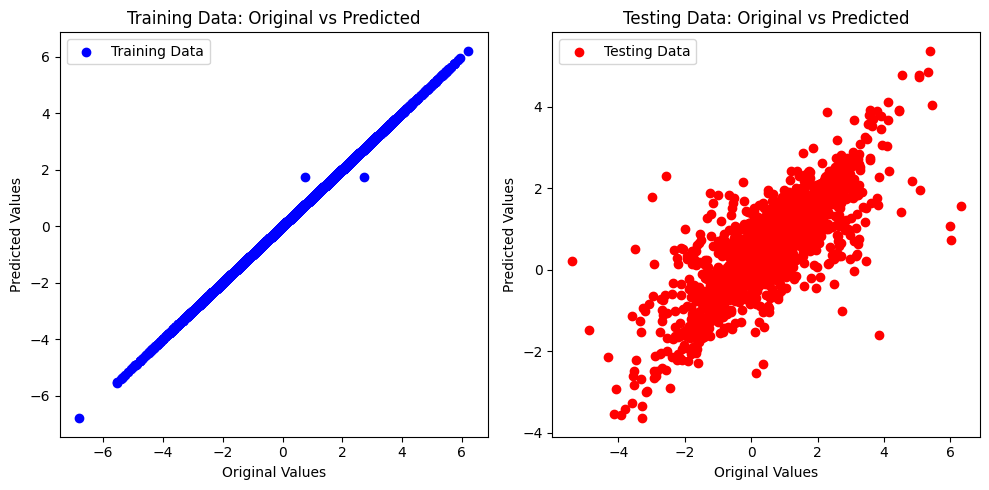

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, reg_pred_train, color='blue', label='Training Data')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: Original vs Predicted')
plt.legend()

# Plotting testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, reg_pred_test, color='red', label='Testing Data')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Testing Data: Original vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

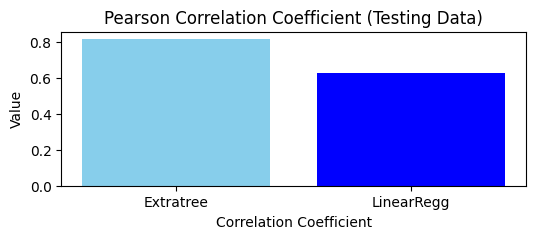

In [ ]:
pcc_test_exrtraTree = np.corrcoef(y_test, reg_pred_test)[0, 1]
pcc_test_regression = np.corrcoef(y_test, reg_pred)[0, 1]
# Plotting
plt.figure(figsize=(6, 2))
plt.bar(["Extratree"], [pcc_test_exrtraTree], color='skyblue')
plt.bar(["LinearRegg"], [pcc_test_regression], color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Value')
plt.title('Pearson Correlation Coefficient (Testing Data)')
# plt.ylim(-1, 1)  # Set y-axis limit to -1 and 1 for correlation coefficient
plt.show()

###Analysing the data

In [ ]:
#Total unique Organisms
Organism = data['Organism'].unique()
print(Organism.shape)

(852,)


In [ ]:
#Unique Organism with their frequencies
unique_strings_with_frequency = data['Organism'].value_counts()
print(unique_strings_with_frequency)

Organism
Homo sapiens                    2410
Escherichia coli                1490
Saccharomyces cerevisiae         637
Rattus norvegicus                552
Arabidopsis thaliana             379
                                ... 
Solanum dulcamara                  1
*                                  1
Bifidobacterium adolescentis       1
Actinidia deliciosa                1
Sulculus diversicolor              1
Name: count, Length: 852, dtype: int64


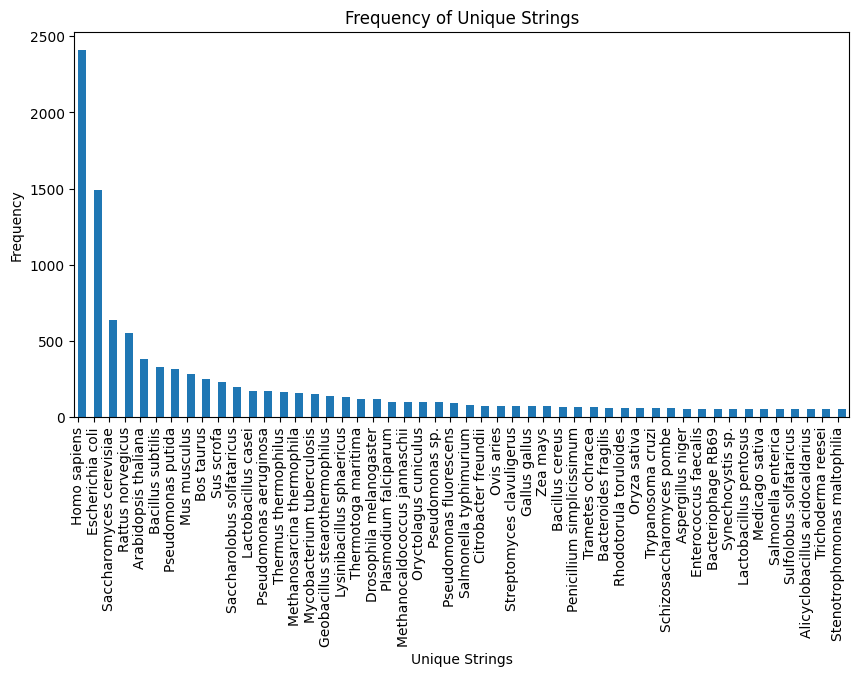

In [ ]:
#plotting of top 50 Unique Organisms along with its frequency
plt.figure(figsize=(10,5))
top_n = 50
unique_strings_with_frequency[:top_n].plot(kind='bar', width=0.5, edgecolor='none', align='edge')
# unique_strings_with_frequency.plot(kind='bar', width=0.5, edgecolor='none', align='edge')
plt.title('Frequency of Unique Strings')
plt.xlabel('Unique Strings')
plt.ylabel('Frequency')
# plt.xticks([])
plt.show()

In [ ]:
#All sequences lengths
string_lengths = data['Sequence'].str.len()
print(string_lengths)

0         445
1        1583
2        1563
3         292
4         292
         ... 
16833     432
16834     432
16835     432
16836     435
16837     435
Name: Sequence, Length: 16838, dtype: int64


In [ ]:
max_lengths = string_lengths.idxmax()

In [ ]:
print(max_lengths)

4001


In [ ]:
print(min(string_lengths))

9


In [ ]:
group = string_lengths.value_counts()

In [ ]:
group

Sequence
323     281
316     261
381     198
322     188
347     184
       ... 
540       1
1025      1
972       1
1046      1
122       1
Name: count, Length: 777, dtype: int64

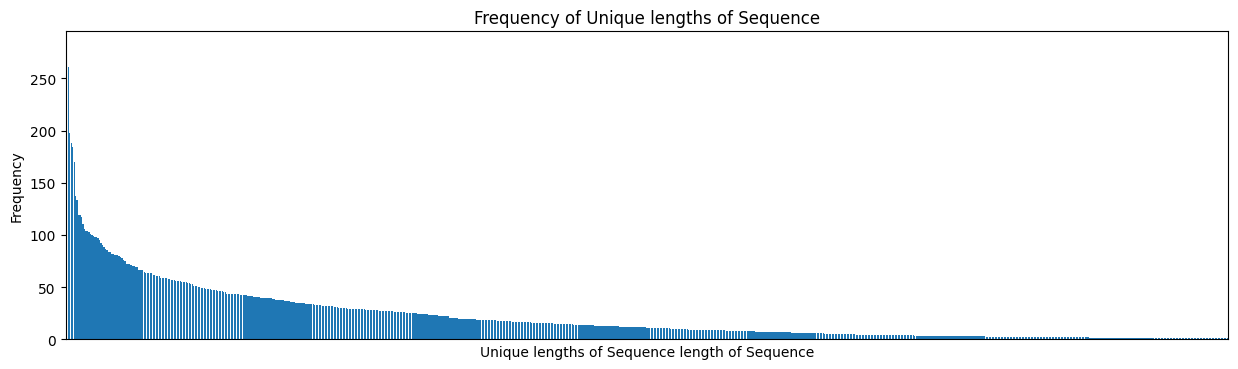

In [ ]:
#plotting of top Unique lengths of Sequence along with its frequency
plt.figure(figsize=(15,4))
group.plot(kind='bar', width=0.8, edgecolor='none', align='edge')
plt.title('Frequency of Unique lengths of Sequence')
plt.xlabel('Unique lengths of Sequence')
plt.ylabel('Frequency')
plt.xticks([])
plt.show()

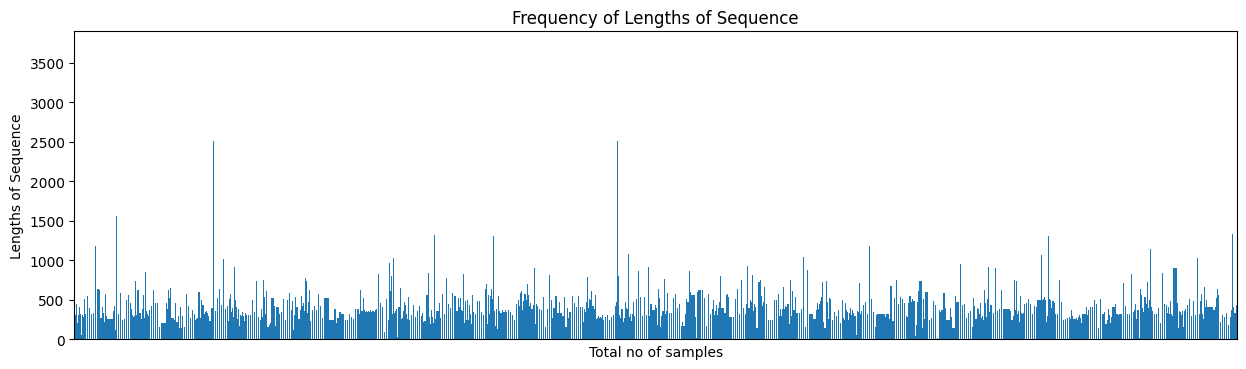

In [ ]:
#plotting of lengths of Sequence along with total no of samples
plt.figure(figsize=(15,4))
string_lengths.plot(kind='barh', width=0.8, edgecolor='none', align='edge')
plt.title('Frequency of Lengths of Sequence')
plt.xlabel('Total no of samples')
plt.ylabel('Lengths of Sequence')
plt.xticks([])
plt.show()

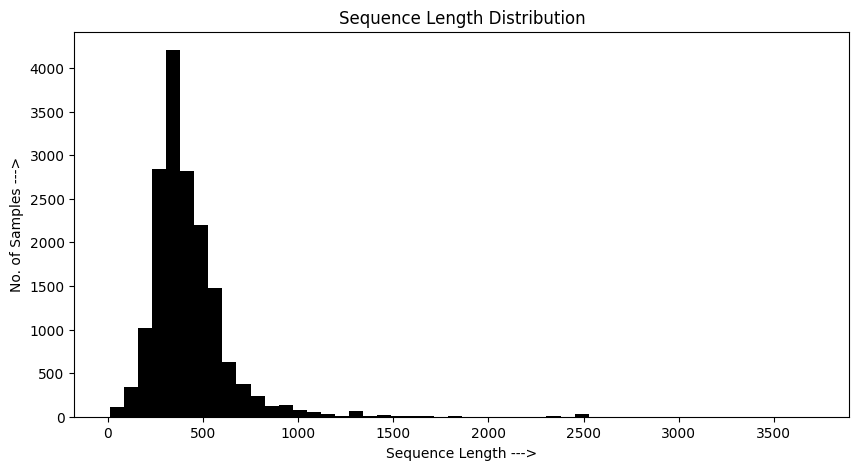

Total samples in histogram bins: 16838.0


In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 5))
# plt.hist(string_lengths, bins=100, color='black')
counts, bin_edges, _ = plt.hist(string_lengths, bins=50, color='black')


# Adding labels and title
plt.xlabel('Sequence Length --->')
plt.ylabel('No. of Samples --->')
plt.title('Sequence Length Distribution')

# Display the plot
plt.show()
print(f"Total samples in histogram bins: {sum(counts)}")

In [ ]:
y_test

7439     1.371068
14338   -1.537602
1889     0.865104
2848     2.309630
10399    0.758155
           ...   
13901   -0.992821
2853    -1.481486
5375     2.972666
4826     1.276462
14163    1.146128
Name: Value, Length: 3368, dtype: float64

In [ ]:
test_data = data.drop(y_train.index)

In [ ]:
test_data

,Unnamed: 0.1,Unnamed: 0,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Value,Unit
0,0,0,4.2.3.4,Actinidia chinensis,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,wildtype,1.303196,s^(-1)
3,3,3,2.1.1.255,Streptomyces coelicolor,C[S+](CCC(C(=O)[O-])N)CC1C(C(C(O1)N2C=NC3=C(N=...,S-Adenosyl-L-methionine,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,-2.124939,s^(-1)
8,8,8,1.2.1.65,Pseudomonas sp.,C1=CC=C(C(=C1)C=O)O,o-Hydroxybenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,1.971276,s^(-1)
14,14,14,1.10.3.4,Streptomyces griseus,C1=CC(=C(C=C1C=O)O)O,"3,4-Dihydroxybenzaldehyde",MVHVRKNHLTMTAEEKRRFVHAVLEIKRRGIYDRFVKLHIQINSTD...,wildtype,-0.096910,s^(-1)
19,19,19,2.1.1.269,Ruegeria pomeroyi,C[S+](C)CCC(=O)[O-],dimethylsulfoniopropionate,MASIFPSRRVRRTPFSAGVEAAGVKGYTVYNHMLLPTVFDSLQADC...,wildtype,0.380211,s^(-1)
...,...,...,...,...,...,...,...,...,...,...
16814,16986,16986,1.2.1.12,Oryza sativa,C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O...,NAD+,MGKIKIGINGFGRIGRLVARVALQSEDVELVAVNDPLITTDYMTYM...,mutant,-1.045757,s^(-1)
16815,16987,16987,1.2.1.12,Oryza sativa,C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O...,NAD+,MGKIKIGINGFGRIGRLVARVALQSEDVELVAVNDPTITTDYMTYM...,mutant,-0.886057,s^(-1)
16827,16999,16999,1.3.1.12,Escherichia coli,C1=CC(C=CC1O)(CC(=O)C(=O)O)C(=O)O,Prephenate,MVAELTALRDQIDEVDKALLNLLAKRLELVAEVGEVKSRFGLPIYV...,mutant,1.301030,s^(-1)
16833,17005,17005,1.1.1.82,Zea mays,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,NADPH,MGLSTVYSPAGPRLVPAPLGRCRSAQPRRPRRAPLATVRCSVDATK...,wildtype,2.980003,s^(-1)


In [ ]:
test_data_length = test_data['Sequence'].str.len()

In [ ]:
test_data_length

0        445
3        292
8        483
14       306
19       364
        ... 
16814    337
16815    337
16827    373
16833    432
16836    435
Name: Sequence, Length: 3368, dtype: int64

In [ ]:
predicted_data = pd.DataFrame({'Sequence':test_data['Sequence'], 'Sequence_len':test_data_length , 'smiles': test_data['Smiles'], 'ECNumber': test_data['ECNumber'],
                            'Organism': test_data['Organism'], 'Substrate': test_data['Substrate'], 'Type': test_data['Type'],
                            'Kcat': test_data['Value'], 'Predict_Label': reg_pred, 'Unit':test_data['Unit']})

In [ ]:
predicted_data.to_csv('/content/drive/MyDrive/Predicted_test_data_3368.csv')

NameError: name 'predicted_data' is not defined

In [ ]:
td = pd.read_csv('/content/drive/MyDrive/Predicted_test_data_3368.csv')

In [ ]:
seq_len_grp = td['Sequence_len'].value_counts()
seq_len_grp

Sequence_len
323    64
316    46
244    43
322    38
347    36
       ..
777     1
876     1
834     1
578     1
163     1
Name: count, Length: 594, dtype: int64

In [ ]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
h = 0
l = 0
j = 0
k = 0
for i in range(len(td)):
  if td['Sequence_len'][i] <= 100 :
    a+=1
  elif 100 < td['Sequence_len'][i] <=200:
    b+=1
  elif 200 < td['Sequence_len'][i] <=300:
    c+=1
  elif 300 < td['Sequence_len'][i] <=400:
    d+=1
  elif 400 < td['Sequence_len'][i] <=500:
    e+=1
  elif 500 < td['Sequence_len'][i] <=600:
    f+=1
  elif 600 < td['Sequence_len'][i] <=700:
    g+=1
  elif 700 < td['Sequence_len'][i] <=800:
    h+=1
  elif 800 < td['Sequence_len'][i] <=900:
    l+=1
  elif 900 < td['Sequence_len'][i] <=1000:
    j+=1
  elif 1000 < td['Sequence_len'][i]:
    k+=1

In [ ]:
print(a,b,c,d,e,f,g,h,l,j,k)

29 138 642 1109 596 468 162 83 45 34 62


In [ ]:
num_occurrences = ((td['Sequence_len'] > 800) & (td['Sequence_len'] <=900)).sum()
print(num_occurrences)

45


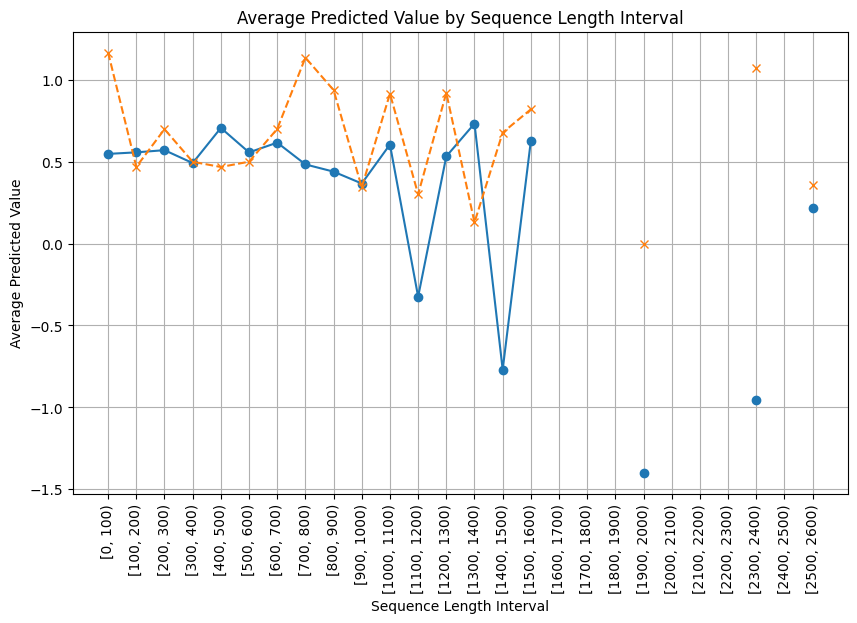

In [ ]:
df = td

# Define bins
bins = np.arange(0, df['Sequence_len'].max() + 100, 100)

# Assign sequence lengths to bins
df['binned_length'] = pd.cut(df['Sequence_len'], bins, right=False)

# Group by the binned lengths and calculate the mean predicted and actual values
binned_avg = df.groupby('binned_length').agg(
    avg_predicted_value=('Predict_Label', 'mean'),
    avg_actual_value=('Kcat', 'mean')
).reset_index()

# # Group by the binned lengths and calculate the mean predicted value
# binned_avg = df.groupby('binned_length')['Predict_Label'].mean().reset_index()

# Convert binned lengths to a string format for better x-axis labeling
binned_avg['binned_length_str'] = binned_avg['binned_length'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(binned_avg['binned_length_str'], binned_avg['avg_predicted_value'], marker='o', linestyle='-')
plt.plot(binned_avg['binned_length_str'], binned_avg['avg_actual_value'], marker='x', linestyle='--', label='Avg Actual Value')
plt.xlabel('Sequence Length Interval')
plt.ylabel('Average Predicted Value')
plt.title('Average Predicted Value by Sequence Length Interval')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
cls1 = (data['ECNumber'].str.split('.').str[0] == str(1))
indices_to_drop = data[~cls1].index
cls1 = data.drop(indices_to_drop)
cls1_fet = X.drop(indices_to_drop)

In [ ]:
print(cls1.shape)
print(cls1_fet.shape)

(6609, 10)
(6609, 2048)


In [ ]:
cls2 = (data['ECNumber'].str.split('.').str[0] == str(2))
indices_to_drop = data[~cls2].index
cls2 = data.drop(indices_to_drop)
cls2_fet = X.drop(indices_to_drop)
cls2_fet.shape

(4099, 2048)

In [ ]:
cls2.shape

(4099, 10)

In [ ]:
cls3 = (data['ECNumber'].str.split('.').str[0] == str(3))
indices_to_drop = data[~cls3].index
cls3 = data.drop(indices_to_drop)
cls3_fet = X.drop(indices_to_drop)
cls3.shape
cls3_fet.shape

(3163, 2048)

In [ ]:
cls4 = (data['ECNumber'].str.split('.').str[0] == str(4))
indices_to_drop = data[~cls4].index
cls4 = data.drop(indices_to_drop)
cls4_fet = X.drop(indices_to_drop)
cls4.shape
cls4_fet.shape

(1600, 2048)

In [ ]:
cls5 = (data['ECNumber'].str.split('.').str[0] == str(5))
indices_to_drop = data[~cls5].index
cls5 = data.drop(indices_to_drop)
cls5_fet = X.drop(indices_to_drop)
cls5.shape
cls5_fet.shape

(802, 2048)

In [ ]:
cls6 = (data['ECNumber'].str.split('.').str[0] == str(6))
indices_to_drop = data[~cls6].index
cls6 = data.drop(indices_to_drop)
cls6_fet = X.drop(indices_to_drop)
cls6.shape
cls6_fet.shape

(557, 2048)

In [ ]:
cls7 = (data['ECNumber'].str.split('.').str[0] == str(7))
indices_to_drop = data[~cls7].index
cls7 = data.drop(indices_to_drop)
cls7_fet = X.drop(indices_to_drop)
cls7.shape
cls7_fet.shape

(8, 2048)

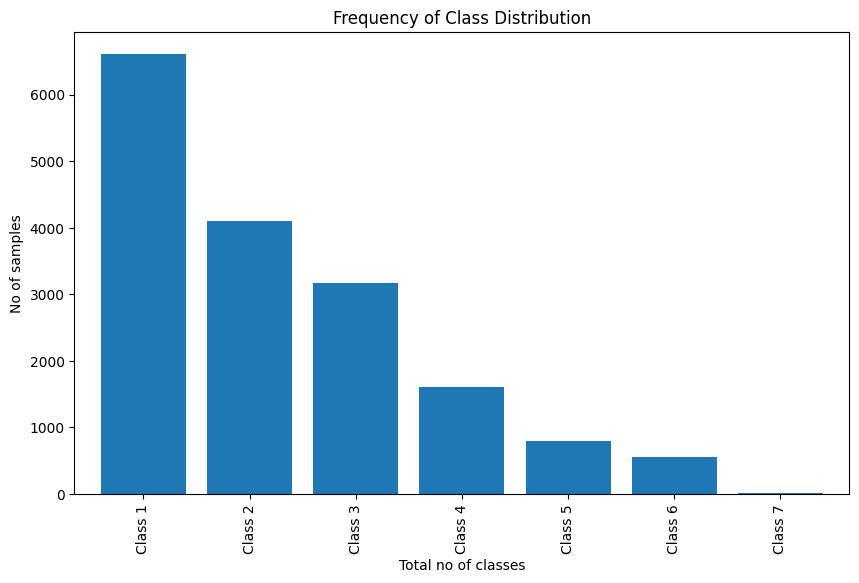

In [ ]:
class_counts =[len(cls1), len(cls2), len(cls3), len(cls4), len(cls5), len(cls6), len(cls7)]
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

x_class = pd.Series(class_counts, index=class_labels)
plt.figure(figsize = (10,6))
x_class.plot(kind='bar', width=0.8, edgecolor='none', align='center')
plt.title('Frequency of Class Distribution')
plt.xlabel('Total no of classes')
plt.ylabel('No of samples')
plt.show()


In [ ]:
cls1.to_csv('/content/drive/MyDrive/class_1_samples.csv')
cls2.to_csv('/content/drive/MyDrive/class_2_samples.csv')
cls3.to_csv('/content/drive/MyDrive/class_3_samples.csv')
cls4.to_csv('/content/drive/MyDrive/class_4_samples.csv')
cls5.to_csv('/content/drive/MyDrive/class_5_samples.csv')
cls6.to_csv('/content/drive/MyDrive/class_6_samples.csv')
cls7.to_csv('/content/drive/MyDrive/class_7_samples.csv')

In [ ]:
cls1_fet.to_csv('/content/drive/MyDrive/class_1_fet_samples.csv')
cls2_fet.to_csv('/content/drive/MyDrive/class_2_fet_samples.csv')
cls3_fet.to_csv('/content/drive/MyDrive/class_3_fet_samples.csv')
cls4_fet.to_csv('/content/drive/MyDrive/class_4_fet_samples.csv')
cls5_fet.to_csv('/content/drive/MyDrive/class_5_fet_samples.csv')
cls6_fet.to_csv('/content/drive/MyDrive/class_6_fet_samples.csv')
cls7_fet.to_csv('/content/drive/MyDrive/class_7_fet_samples.csv')

In [ ]:
cls1.head()

,Unnamed: 0.1,Unnamed: 0,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Value,Unit
5,5,5,1.2.1.65,Pseudomonas sp.,C1=CC=C(C=C1)C=O,Benzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,26.4,s^(-1)
6,6,6,1.2.1.65,Pseudomonas sp.,C1=CC(=CC=C1C=O)[N+](=O)[O-],p-Nitrobenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,59.0,s^(-1)
7,7,7,1.2.1.65,Pseudomonas sp.,C1=CC(=CC(=C1)Cl)C=O,3-Chlorobenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,65.0,s^(-1)
8,8,8,1.2.1.65,Pseudomonas sp.,C1=CC=C(C(=C1)C=O)O,o-Hydroxybenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,93.6,s^(-1)
9,9,9,1.2.1.65,Pseudomonas sp.,C1=CC=C2C=C(C=CC2=C1)C=O,2-Naphthaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,96.0,s^(-1)


In [ ]:
## train test split
from sklearn.model_selection import train_test_split

CX_train, CX_test, Cy_train, Cy_test = train_test_split(
    cls1_fet, cls1['Value'], test_size=0.20, random_state=42)

In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
CX_train=scaler.fit_transform(CX_train)
CX_test=scaler.transform(CX_test)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
Creg = ExtraTreesRegressor()
Creg.fit(CX_train, Cy_train)


ExtraTreesRegressor()

In [ ]:
Creg.score(CX_test, Cy_test)

0.7177396133901814

In [ ]:
Creg_pred_test=Creg.predict(CX_test)
score=r2_score(Cy_test,Creg_pred_test)
score

0.7177396133901814

In [ ]:
mse = mean_squared_error(Cy_test,Creg_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Cy_test,Creg_pred_test)
r_squared = r2_score(Cy_test,Creg_pred_test)

In [ ]:
print('RMSE :', rmse ,', MAE :', mae ,', R-square :',r_squared)

RMSE : 16455.02058725172 , MAE : 1667.2430575812168 , R-square : 0.7177396133901814
